# Relatório de Entrega do Desafio Final

Bootcamp: Data Science

Aluno: André Moreira Pimentel

## Importando bibliotecas

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Coleta de dados

In [17]:
df_consumo = pd.read_csv(r'data\consumo_energia_eletrica.csv')

In [18]:
df_consumo.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624


In [19]:
# Orientação para excluir os dados ausentes
df_consumo.dropna(inplace=True)


In [20]:
df_estado = pd.read_csv(r'data\estado_regiao.csv', encoding='latin1',sep=';')

In [21]:
df_estado.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


### Merge data

In [22]:
df_consumo_estado = pd.merge(df_consumo, df_estado, left_on='sigla_uf', right_on='sigla', how='inner')


In [23]:
df_consumo_estado.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,sigla,estado,regiao,pais
0,2004,1,RN,Outros,40857.0,69617,20,RN,Rio Grande do Norte,Nordeste,Brasil
1,2004,1,SP,Outros,311650.0,937538,25,SP,São Paulo,Sudeste,Brasil
2,2004,1,MS,Outros,56881.0,67601,12,MS,Mato Grosso do Sul,Centro-Oeste,Brasil
3,2004,1,SC,Outros,226165.0,209380,24,SC,Santa Catarina,Sul,Brasil
4,2004,1,RJ,Outros,70634.0,416128,19,RJ,Rio de Janeiro,Sudeste,Brasil


In [24]:
df_consumo_estado.drop(['sigla_uf', 'id_estado'], axis=1, inplace=True)


In [25]:
df_consumo_estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26937 entries, 0 to 26936
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  26937 non-null  int64  
 1   mes                  26937 non-null  int64  
 2   tipo_consumo         26937 non-null  object 
 3   numero_consumidores  26937 non-null  float64
 4   consumo              26937 non-null  int64  
 5   sigla                26937 non-null  object 
 6   estado               26937 non-null  object 
 7   regiao               26937 non-null  object 
 8   pais                 26937 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.8+ MB


In [26]:
df_consumo_estado.describe()

,ano,mes,numero_consumidores,consumo
count,26937.00000,26937.000000,2.693700e+04,2.693700e+04
mean,2013.85867,6.508520,6.954567e+05,3.434690e+05
std,5.93925,3.455573,1.869920e+06,6.090196e+05
min,2004.00000,1.000000,5.200000e+01,3.540000e+02
25%,2009.00000,4.000000,1.874100e+04,6.218800e+04
50%,2014.00000,7.000000,1.084390e+05,1.392380e+05
75%,2019.00000,10.000000,4.581500e+05,3.705280e+05
max,2023.00000,12.000000,1.920126e+07,4.849895e+06


In [27]:
# taxa de consumo por consumidor
df_consumo_estado['consumo_por_consumidor'] = df_consumo_estado['consumo']/df_consumo_estado['numero_consumidores']

In [28]:
# Data ano-mes
# df_consumo_estado['ano-mes'] = df_consumo_estado['ano'].astype(str) + '-' + df_consumo_estado['mes'].astype(str)

## EDA

### Média do consumo de energia mensal por estado

In [29]:
df_group = df_consumo_estado[['estado','ano','mes','consumo','numero_consumidores','consumo_por_consumidor']].groupby(['estado','ano','mes']).mean()
df_group.head()

consumo  numero_consumidores  consumo_por_consumidor
estado ano  mes                                                      
Acre   2004 1    8709.75             31568.75                1.008275
            2    8262.00             31810.00                0.980284
            3    8464.00             32035.50                1.047290
            4    8739.50             32099.75                1.021501
            5    7441.00             32300.25                0.907695

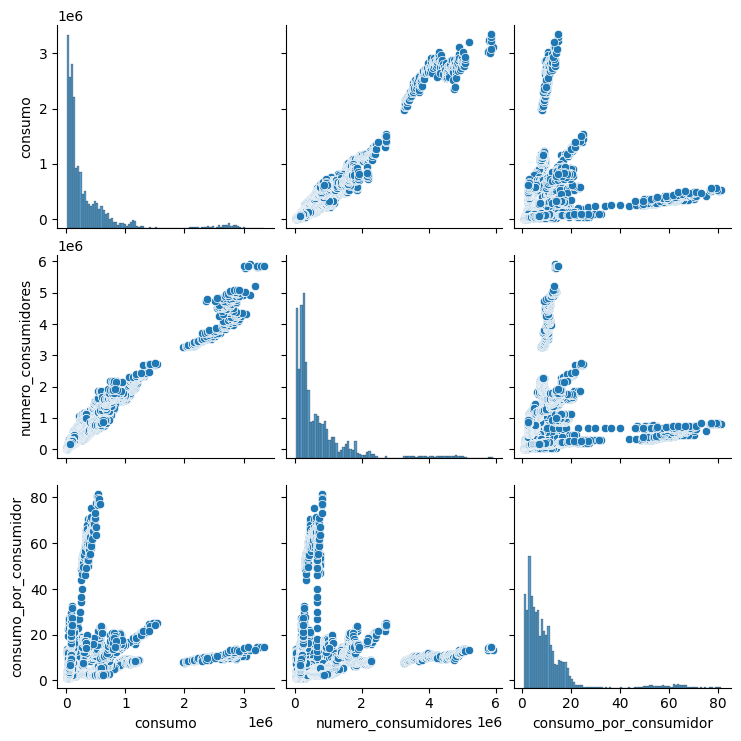

In [30]:
sns.pairplot(df_group)

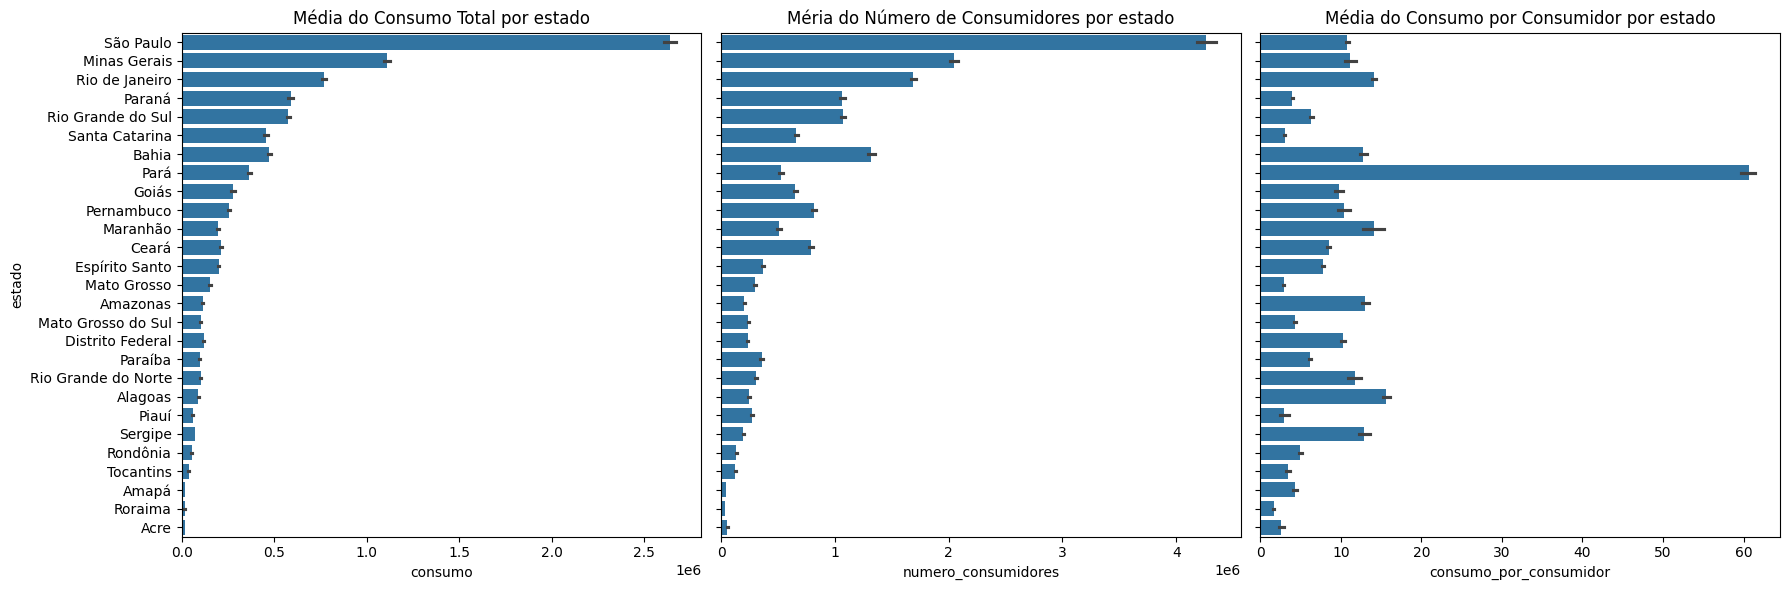

In [31]:
# Configurando os dados e ordenando pela coluna 'consumo'
df_sorted = df_group.sort_values(by='consumo', ascending=False)

# Criando a figura e os subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 linha, 3 colunas

# Gráfico 1: Consumo total
sns.barplot(data=df_sorted, y='estado', x='consumo', orient='h', ax=axes[0])
axes[0].set_title('Média do Consumo Total por estado')

# Gráfico 2: Consumo médio
sns.barplot(data=df_sorted, y='estado', x='numero_consumidores', orient='h', ax=axes[1])
axes[1].set_title('Méria do Número de Consumidores por estado')

# Gráfico 3: Consumo por habitante
sns.barplot(data=df_sorted, y='estado', x='consumo_por_consumidor', orient='h', ax=axes[2])
axes[2].set_title('Média do Consumo por Consumidor por estado')

# Ajustando os layouts
plt.tight_layout()
plt.show()

In [32]:
df_coluns = df_sorted.groupby('estado').mean().sort_values(by='consumo',ascending=False).reset_index().head(10).iloc[:,0].tolist()
df_coluns

['São Paulo',
 'Minas Gerais',
 'Rio de Janeiro',
 'Paraná',
 'Rio Grande do Sul',
 'Bahia',
 'Santa Catarina',
 'Pará',
 'Goiás',
 'Pernambuco']

### distribuição dos dados mensais

In [33]:
df_reset_index=df_group.reset_index()
df_reset_index.head()

,estado,ano,mes,consumo,numero_consumidores,consumo_por_consumidor
0,Acre,2004,1,8709.75,31568.75,1.008275
1,Acre,2004,2,8262.00,31810.00,0.980284
2,Acre,2004,3,8464.00,32035.50,1.047290
3,Acre,2004,4,8739.50,32099.75,1.021501
4,Acre,2004,5,7441.00,32300.25,0.907695


In [34]:
df_filtrado = df_reset_index[df_reset_index['estado'].isin(df_coluns)]


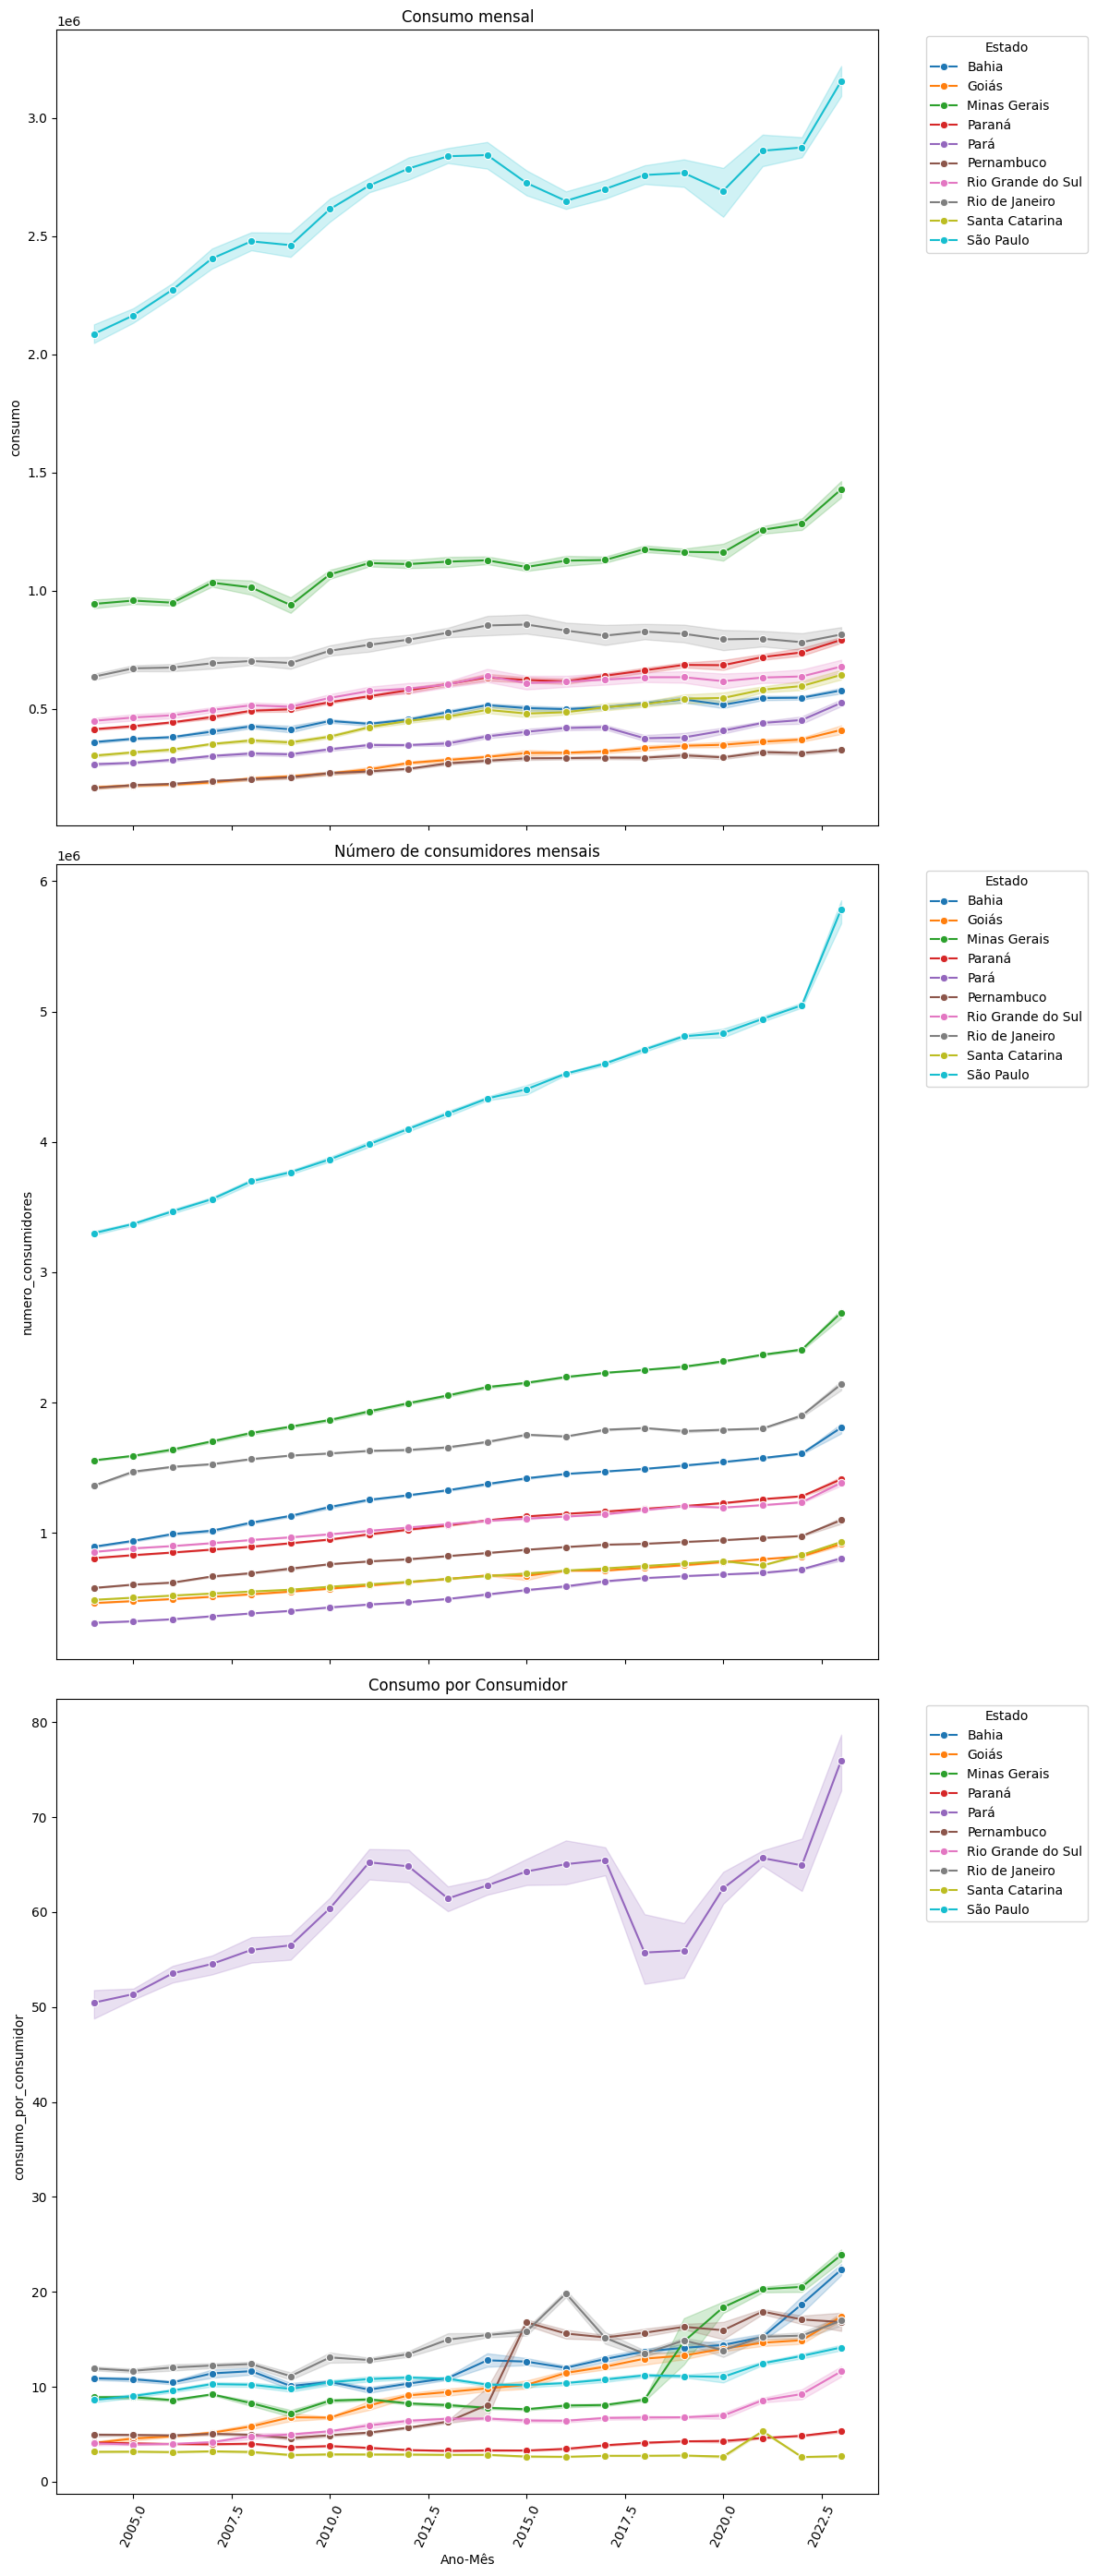

In [36]:
# Criando a figura e os subplots (3 linhas e 1 coluna)
fig, axes = plt.subplots(3, 1, figsize=(12, 28), sharex=True)  # 3 linhas, 1 coluna

# Configurações dos gráficos
metrics = ['consumo', 'numero_consumidores', 'consumo_por_consumidor']  # Métricas a comparar
titles = ['Consumo mensal', 'Número de consumidores mensais', 'Consumo por Consumidor']  # Títulos correspondentes

# Loop para criar cada gráfico
for i, (metric, title) in enumerate(zip(metrics, titles)):
    sns.lineplot(
        data=df_filtrado, 
        x='ano', y=metric, hue='estado', 
        ax=axes[i], marker='o'
    )
    axes[i].set_title(title)  # Define o título
    axes[i].set_ylabel(metric)  # Define o rótulo do eixo Y
    axes[i].legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')  # Posiciona a legenda

# Inclinar os rótulos do eixo X em 65°
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(65)

# Ajusta o layout e rótulos
plt.tight_layout()
plt.xlabel('Ano')
plt.show()


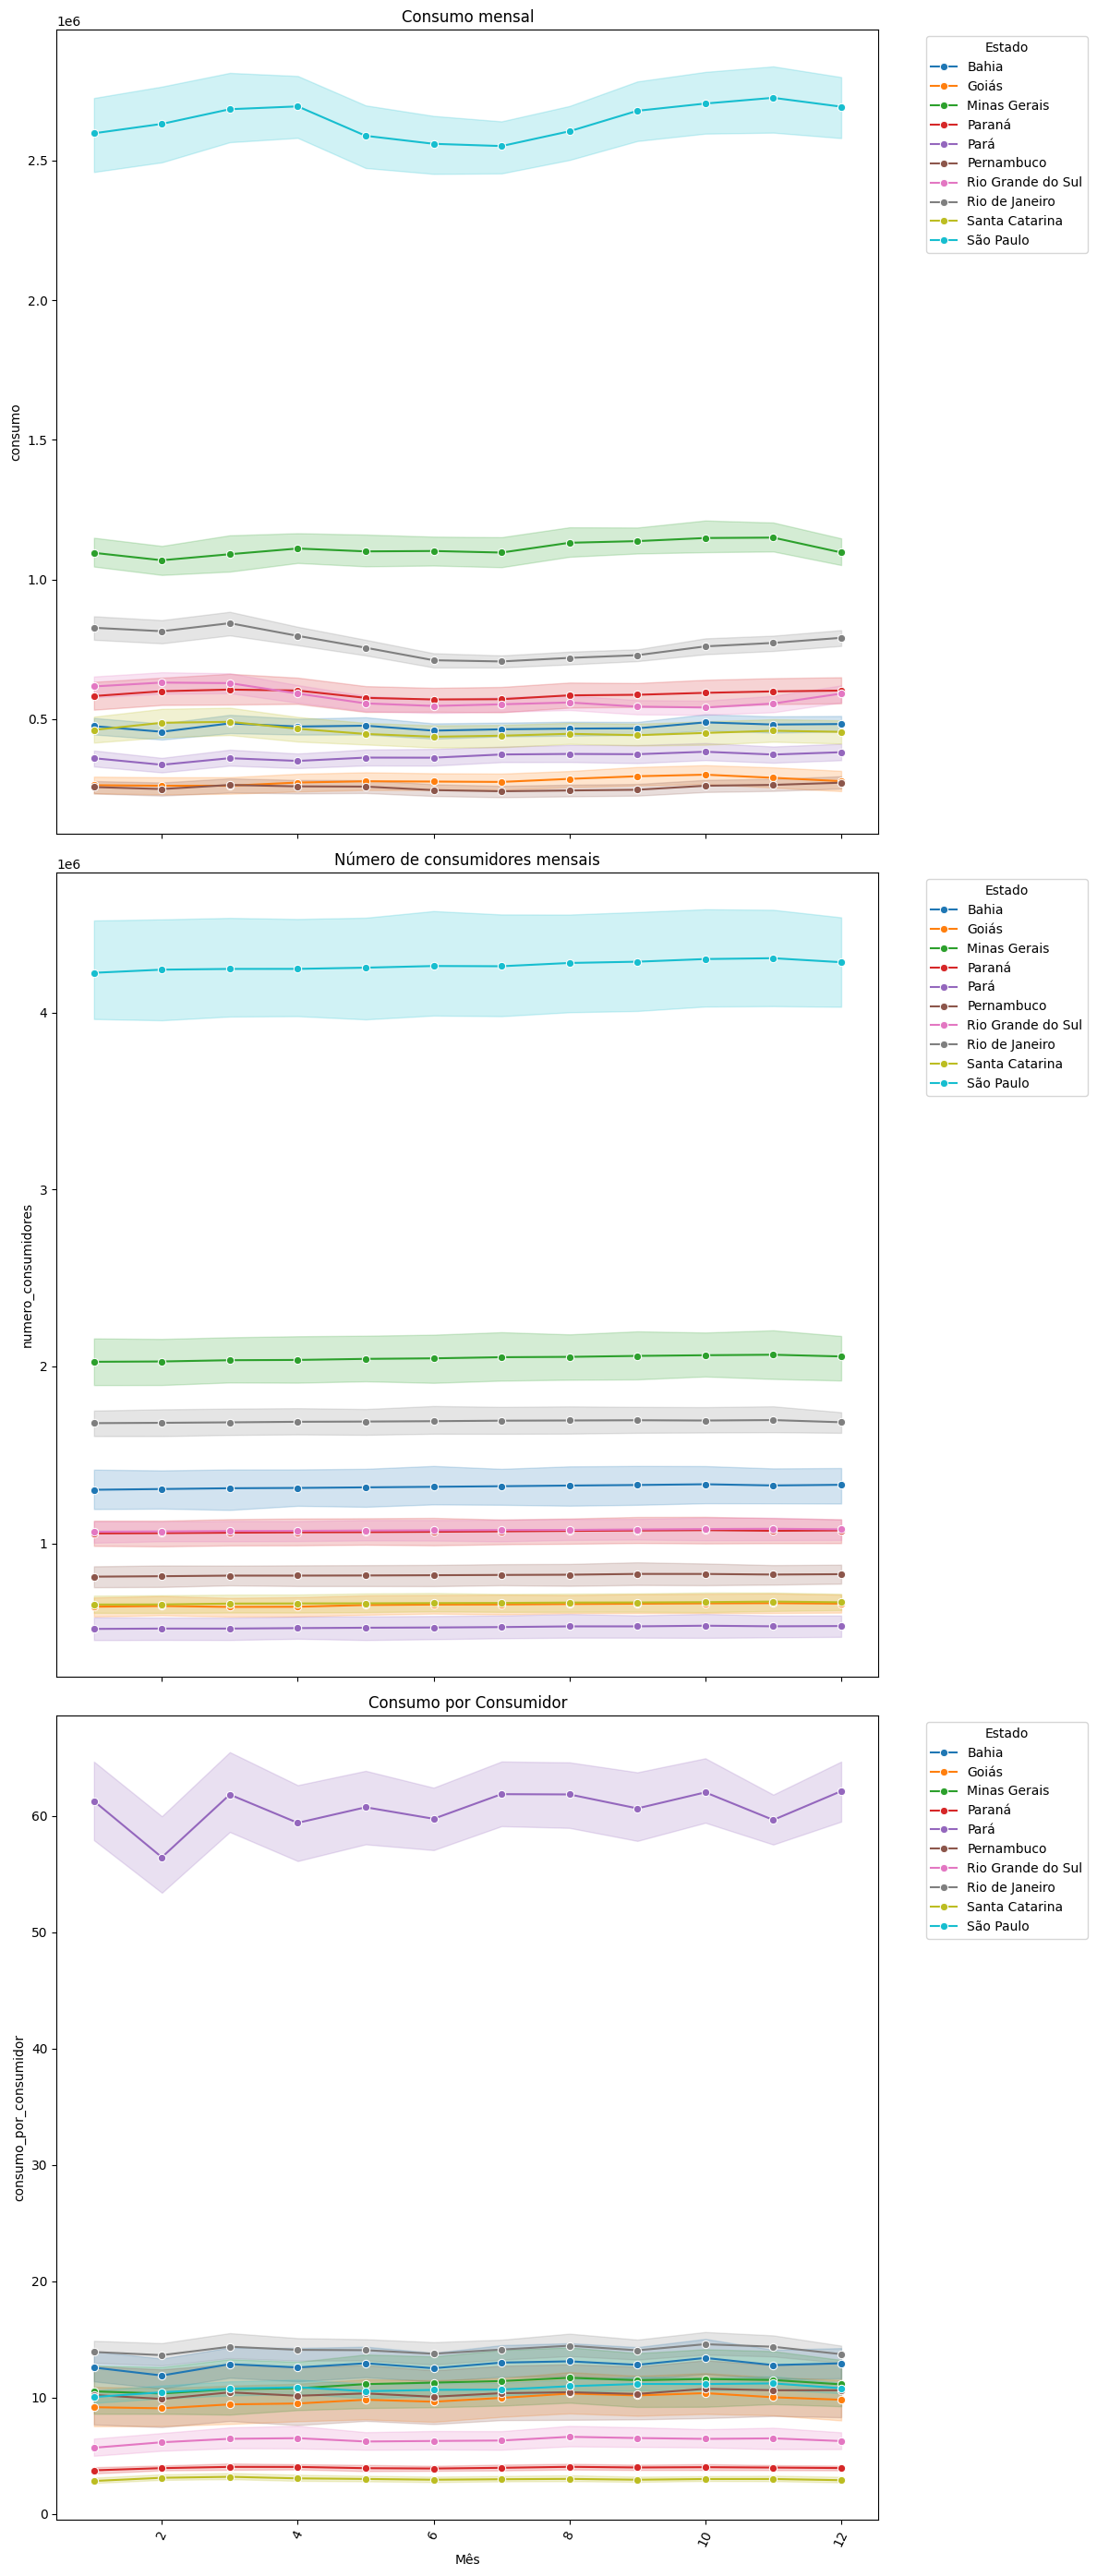

In [37]:
# Criando a figura e os subplots (3 linhas e 1 coluna)
fig, axes = plt.subplots(3, 1, figsize=(12, 28), sharex=True)  # 3 linhas, 1 coluna

# Configurações dos gráficos
metrics = ['consumo', 'numero_consumidores', 'consumo_por_consumidor']  # Métricas a comparar
titles = ['Consumo mensal', 'Número de consumidores mensais', 'Consumo por Consumidor']  # Títulos correspondentes

# Loop para criar cada gráfico
for i, (metric, title) in enumerate(zip(metrics, titles)):
    sns.lineplot(
        data=df_filtrado, 
        x='mes', y=metric, hue='estado', 
        ax=axes[i], marker='o'
    )
    axes[i].set_title(title)  # Define o título
    axes[i].set_ylabel(metric)  # Define o rótulo do eixo Y
    axes[i].legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')  # Posiciona a legenda

# Inclinar os rótulos do eixo X em 65°
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(65)

# Ajusta o layout e rótulos
plt.tight_layout()
plt.xlabel('Mês')
plt.show()


In [ ]:
# Criando o boxplot horizontal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_consumo_estado, x='consumo', y='estado', orient='h', palette='viridis')

# Personalização
plt.title('Distribuição do Consumo por Estado', fontsize=14)
plt.xlabel('Consumo', fontsize=12)
plt.ylabel('Estado', fontsize=12)

# Exibindo o gráfico
plt.show()

### <Descreva, explique e evidencie o primeiro passo executado>

### <Descreva, explique e evidencie o primeiro passo executado>

In [ ]:
# Como as variáveis afetam o target?
# sns.pairplot(df_consumo_estado,palette='Dark2',hue='consumo')

## Conclusão

### Aplicação dos conhecimentos

### Principais dificuldades e superações

### Resultados obtidos

### Lições aprendidas

### Melhorias futuras